# Final Submission: Rekomendasi Wisata di 5 Kota di Indonesia



- Name:  Dzulfikri Adjmal
- Email: dzulfikriadjmal@gmail.com
- ID Dicoding: dzulfikriadjmal

# Mengimport library yang dibutuhkan

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

from pathlib import Path


## Data Assessing

Memuat semua data destinasi wisata

In [2]:
df_user = pd.read_csv('./dataset/indonesia-tourism-destination/user.csv')
df_destination = pd.read_csv('./dataset/indonesia-tourism-destination/tourism_with_id.csv')
df_rating = pd.read_csv('./dataset/indonesia-tourism-destination/tourism_rating.csv')
df_package = pd.read_csv('./dataset/indonesia-tourism-destination/package_tourism.csv')

Melihat deskripsi data user

In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Melihat deskripsi data destinasi

In [4]:
df_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Melihat deskripsi data rating

In [5]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Melihat deskripsi data paket wisata

In [6]:
df_package.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


Melihat sample data user menggunakan `head()`

In [7]:
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Melihat sample data destinasi menggunakan `head()`

In [8]:
df_destination.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Melihat sample data rating menggunakan `head()`

In [9]:
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Melihat sample data paket wisata menggunakan `head()`

In [10]:
df_package.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


Mengecek missing value pada data user

In [11]:
df_user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

Mengecek missing value pada data destinasi

In [12]:
df_destination.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Mengecek missing value pada data rating

In [13]:
df_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

Mengecek missing value pada data paket wisata

In [14]:
df_package.isna().sum()

Package            0
City               0
Place_Tourism1     0
Place_Tourism2     0
Place_Tourism3     0
Place_Tourism4    34
Place_Tourism5    61
dtype: int64

## Preprocessing Data

Mengecek nilai pada kolom rating

In [15]:
print(f"Nilai rating (user): {df_rating['Place_Ratings'].unique()}")
print(f"Nilai rating (destinasi): {df_destination['Rating'].unique()}")

Nilai rating (user): [3 2 5 4 1]
Nilai rating (destinasi): [4.6 4.5 4.  4.4 4.2 4.8 4.3 4.7 5.  4.1 3.8 3.9 4.9 3.4]


Melihat ukuran data

In [16]:
print(f"Banyak rating: {len(df_rating)}")
print(f"Banyak user: {len(df_user)}")
print(f"Banyak destinasi: {len(df_destination)}")

Banyak rating: 10000
Banyak user: 300
Banyak destinasi: 437


melihat data kategori wisata

In [17]:
df_destination['Category'].unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

Menghapus kolom yang tidak diperlukan

In [18]:
df_destination.drop([
    "Time_Minutes", 
    "Coordinate", 
    "Lat", 
    "Long", 
    "Unnamed: 11", 
    "Unnamed: 12"
], axis=1, inplace=True)
df_destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6


Menggabungkan data rating dengan data user

In [19]:
data_destinasi = df_destination.copy()
data_rating_user = df_rating.copy()

data_rekomendasi = pd.merge(data_rating_user, df_user, on='User_Id')
data_rekomendasi.head()

,User_Id,Place_Id,Place_Ratings,Location,Age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20


Menggabungkan data dengan data destinasi

In [20]:
data_rekomendasi = pd.merge(data_rekomendasi, data_destinasi, on='Place_Id')
data_rekomendasi.head()

,User_Id,Place_Id,Place_Ratings,Location,Age,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,1,344,2,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1
2,1,5,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
3,1,373,3,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5
4,1,101,4,"Semarang, Jawa Tengah",20,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0


Mengubah nama kolom rating agar lebih mudah dibedakan antara rating dari user dengan rating rata-rata

In [21]:
data_rekomendasi.rename(columns={
    "Place_Ratings": "Rating_User",
    "Rating": "Rating Destination"
}, inplace=True)
data_rekomendasi.head()

,User_Id,Place_Id,Rating_User,Location,Age,Place_Name,Description,Category,City,Price,Rating Destination
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,1,344,2,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1
2,1,5,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
3,1,373,3,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5
4,1,101,4,"Semarang, Jawa Tengah",20,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0


Mengecek apakah terdapat data yang duplikat

In [22]:
data_rekomendasi.duplicated().sum()

79

Menghapus data yang duplikat

In [23]:
data_rekomendasi.drop_duplicates(inplace=True)
data_rekomendasi.shape

(9921, 11)

## Exploratory Data Analysis

Melihat jumlah kategori wisata di setiap kota

In [24]:
destination_count = data_rekomendasi.groupby(by=['City', 'Category']).agg({
    'Place_Id': 'count'
}).reset_index().rename(columns={"Place_Id": "Jumlah Destinasi"})

destination_count_plot = px.bar(
    destination_count, 
    x='City', 
    y='Jumlah Destinasi', 
    color='Category',
    barmode='group',
    text='Jumlah Destinasi',
    title='Jumlah Destinasi Wisata Berdasarkan Kota dan Kategori'
)
destination_count_plot.show()


Tempat wisata dengan rating tertinggi di setiap kota

In [55]:
top_destination = data_rekomendasi.loc[data_rekomendasi.groupby('City')['Rating Destination'].idxmax()][['City', 'Place_Name', 'Rating Destination']]

top_destination_plot = px.bar(
    top_destination, 
    x='Rating Destination', 
    y='City', 
    text='Rating Destination',
    color='Place_Name',
    orientation='h',
    title='Destinasi Wisata Terbaik Berdasarkan Kota'
)
top_destination_plot.show()

## Content Based Filtering - Cosine Similarity

Menyalin data rekomendasi agar tidak merusak data asli

In [26]:
rekomen_cosine = data_rekomendasi.copy()
rekomen_cosine.head()

,User_Id,Place_Id,Rating_User,Location,Age,Place_Name,Description,Category,City,Price,Rating Destination
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,1,344,2,"Semarang, Jawa Tengah",20,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1
2,1,5,5,"Semarang, Jawa Tengah",20,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
3,1,373,3,"Semarang, Jawa Tengah",20,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5
4,1,101,4,"Semarang, Jawa Tengah",20,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0


Membuat tag pada data destinasi yang terdiri dari kategori dan nama kota.

In [27]:
place_name = rekomen_cosine['Place_Name'].to_list()
place_category = rekomen_cosine['Category'].to_list()
place_city = rekomen_cosine['City'].to_list()

place_tag = [f"{place_category[i]}, {place_city[i]}" for i in range(len(place_name))]
place_tag[:5]

['Budaya, Yogyakarta',
 'Bahari, Semarang',
 'Taman Hiburan, Jakarta',
 'Budaya, Semarang',
 'Budaya, Yogyakarta']

Melihat jumlah tag

In [69]:
print(f"Jumlah tag: {len(place_tag)}")
print(f"Tag yang tersedia: {len(set(place_tag))}")
print(f"Tag: {set(place_tag)}")

Jumlah tag: 9921
Tag yang tersedia: 27
Tag: {'Tempat Ibadah, Semarang', 'Bahari, Surabaya', 'Budaya, Semarang', 'Bahari, Jakarta', 'Cagar Alam, Jakarta', 'Pusat Perbelanjaan, Jakarta', 'Budaya, Yogyakarta', 'Cagar Alam, Surabaya', 'Taman Hiburan, Surabaya', 'Budaya, Bandung', 'Cagar Alam, Yogyakarta', 'Tempat Ibadah, Bandung', 'Tempat Ibadah, Jakarta', 'Bahari, Semarang', 'Taman Hiburan, Yogyakarta', 'Cagar Alam, Bandung', 'Pusat Perbelanjaan, Yogyakarta', 'Bahari, Yogyakarta', 'Tempat Ibadah, Surabaya', 'Taman Hiburan, Semarang', 'Taman Hiburan, Bandung', 'Budaya, Jakarta', 'Pusat Perbelanjaan, Surabaya', 'Pusat Perbelanjaan, Bandung', 'Taman Hiburan, Jakarta', 'Budaya, Surabaya', 'Cagar Alam, Semarang'}


Membuat dataframe yang berisi destinasi id, nama destinasi, dan tag

In [29]:
data_rekomen_cosine = pd.DataFrame({
    "destination_id": rekomen_cosine['Place_Id'],
    "destination_name": place_name,
    "destination_tag": place_tag
})

data_rekomen_cosine.dropna(subset=['destination_tag'], inplace=True)
data_rekomen_cosine.head()

,destination_id,destination_name,destination_tag
0,179,Candi Ratu Boko,"Budaya, Yogyakarta"
1,344,Pantai Marina,"Bahari, Semarang"
2,5,Atlantis Water Adventure,"Taman Hiburan, Jakarta"
3,373,Museum Kereta Ambarawa,"Budaya, Semarang"
4,101,Kampung Wisata Sosro Menduran,"Budaya, Yogyakarta"


Mengecek data duplikat pada data rekomendasi

In [30]:
data_rekomen_cosine.duplicated().sum()

9484

Menghapus data duplikat pada data rekomendasi

In [ ]:
data_rekomen_cosine.drop_duplicates(inplace=True)
data_rekomen_cosine.duplicated().sum()

Mengubah kumpulan tag destinasi menjadi representasi numerik (vektor) menggunakan teknik TF-IDF

In [32]:
tfidf = TfidfVectorizer()

tfidf.fit(data_rekomen_cosine['destination_tag'])
tfidf.get_feature_names_out()

array(['alam', 'bahari', 'bandung', 'budaya', 'cagar', 'hiburan',
       'ibadah', 'jakarta', 'perbelanjaan', 'pusat', 'semarang',
       'surabaya', 'taman', 'tempat', 'yogyakarta'], dtype=object)

Mengubah tag destinasi menjadi matriks TF-IDF, yang merupakan representasi numerik dari dokumen (destinasi) dan kata-kata (tag)

In [33]:
tfidf_matrix = tfidf.fit_transform(data_rekomen_cosine['destination_tag'])
tfidf_matrix.shape

(437, 15)

Mengubah matriks TF-IDF yang awalnya disimpan dalam format sparse menjadi format dense

In [34]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.69559204],
        [0.        , 0.72824058, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.5360408 , 0.        ,
         0.        ],
        ...,
        [0.        , 0.7724966 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.55900007, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57127819, 0.        ,
         0.58930677]])

Menampilkan sampel acak dari 5 destinasi dan 15 tag destinasi, dengan nilai-nilai TF-IDF yang menunjukkan relevansi setiap tag terhadap masing-masing destinasi.

In [35]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data_rekomen_cosine['destination_name']
).sample(15, axis=1).sample(5, axis=0)

,semarang,yogyakarta,ibadah,bahari,budaya,pusat,surabaya,taman,perbelanjaan,bandung,hiburan,alam,tempat,cagar,jakarta
destination_name,,,,,,,,,,,,,,,
Pantai Marina,0.685322,0.000000,0.0,0.728241,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Bandros City Tour,0.000000,0.000000,0.0,0.000000,0.715975,0.0,0.0,0.000000,0.0,0.698125,0.000000,0.000000,0.0,0.000000,0.0
Goa Pindul,0.000000,0.548987,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.591021,0.0,0.591021,0.0
Sungai Palayangan,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.551699,0.000000,0.589758,0.0,0.589758,0.0
Tugu Pal Putih Jogja,0.000000,0.589307,0.0,0.000000,0.000000,0.0,0.0,0.571278,0.0,0.000000,0.571278,0.000000,0.0,0.000000,0.0


Menghitung cosine similarity antara setiap pasangan destinasi berdasarkan representasi TF-IDF

In [36]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4099171 ],
       [0.        , 1.        , 0.        , ..., 0.56256337, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.41413775, 0.39938865,
        0.61245683],
       ...,
       [0.        , 0.56256337, 0.41413775, ..., 1.        , 0.38888769,
        0.        ],
       [0.        , 0.        , 0.39938865, ..., 0.38888769, 1.        ,
        0.        ],
       [0.4099171 , 0.        , 0.61245683, ..., 0.        , 0.        ,
        1.        ]])

Mengubah matriks cosine similarity menjadi DataFrame Pandas, memberikan nama destinasi sebagai indeks dan kolom, lalu mencetak ukuran DataFrame dan menampilkan 5 baris teratas

In [37]:
cosine_sim_data = pd.DataFrame(
    cosine_sim,
    index=data_rekomen_cosine['destination_name'],
    columns=data_rekomen_cosine['destination_name'],
)
print(f"Ukuran data: {cosine_sim_data.shape}")
cosine_sim_data.head()

Ukuran data: (437, 437)


destination_name,Candi Ratu Boko,Pantai Marina,Atlantis Water Adventure,Museum Kereta Ambarawa,Kampung Wisata Sosro Menduran,Taman Hutan Raya Ir. H. Juanda,Museum Gedung Sate,Museum Taman Prasasti,Pantai Ngrawe (Mesra),Taman Harmoni Keputih,...,Taman Lapangan Banteng,Jakarta Planetarium,Wisata Kampung Krisan Clapar,Monumen Tugu Pahlawan,Taman Vanda,Benteng Pendem,Pantai Cipta,Pulau Tidung,Kebun Binatang Ragunan,Bendung Lepen
destination_name,,,,,,,,,,,,,,,,,,,,,
Candi Ratu Boko,1.000000,0.000000,0.0,0.436506,1.000000,0.0,0.514383,0.473316,0.397740,0.0,...,0.0,0.0,0.000000,0.417932,0.000000,0.436506,0.000000,0.000000,0.000000,0.409917
Pantai Marina,0.000000,1.000000,0.0,0.544324,0.000000,0.0,0.000000,0.000000,0.597443,0.0,...,0.0,0.0,0.480885,0.000000,0.000000,0.544324,1.000000,0.562563,0.000000,0.000000
Atlantis Water Adventure,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.490629,0.000000,0.0,...,1.0,1.0,0.540114,0.000000,0.610949,0.000000,0.000000,0.414138,0.399389,0.612457
Museum Kereta Ambarawa,0.436506,0.544324,0.0,1.000000,0.436506,0.0,0.435010,0.400280,0.000000,0.0,...,0.0,0.0,0.557327,0.353442,0.000000,1.000000,0.544324,0.000000,0.000000,0.000000
Kampung Wisata Sosro Menduran,1.000000,0.000000,0.0,0.436506,1.000000,0.0,0.514383,0.473316,0.397740,0.0,...,0.0,0.0,0.000000,0.417932,0.000000,0.436506,0.000000,0.000000,0.000000,0.409917


Membuat fungsi rekomendasi destinasi berdasarkan nama destinasi yang diberikan dan menampilkan N destinasi yang paling mirip

In [40]:
def destination_recommender(
    destination_name,
    data_similarity=cosine_sim_data,
    items=data_rekomen_cosine[["destination_name", "destination_tag"]],
    topn=5,
):
    index = data_similarity.loc[:, destination_name].to_numpy().argpartition(range(-1, -topn, -1))
    closest = data_similarity.columns[index[-1 : -(topn + 2) : -1]]
    closest = closest.drop(destination_name, errors="ignore")
    return pd.DataFrame(closest).merge(items).head(topn)


Mengambil salah satu nama destinasi secara acak yang akan digunakan untuk melihat rekomendasi destinasi yang mirip

In [64]:
data_rekomen_cosine[data_rekomen_cosine['destination_name'].eq('Museum Nasional')]
random_destination = data_rekomen_cosine.sample(1).iloc[0]
print(f"Destination Name: {random_destination['destination_name']}")
print(f"Destination Tag: {random_destination['destination_tag']}")

Destination Name: Taman Kupu-Kupu Cihanjuang
Destination Tag: Cagar Alam, Bandung


Melihat 10 hasil rekomendasi berdasarkan cosine similarity

In [65]:
destination_recommender(random_destination['destination_name'], topn=10)

,destination_name,destination_tag
0,Gua Belanda,"Cagar Alam, Bandung"
1,Curug Malela,"Cagar Alam, Bandung"
2,Bumi Perkemahan Batu Kuda,"Cagar Alam, Bandung"
3,Taman Bunga Cihideung,"Cagar Alam, Bandung"
4,Wot Batu,"Cagar Alam, Bandung"
5,Kawah Rengganis Cibuni,"Cagar Alam, Bandung"
6,The Lodge Maribaya,"Cagar Alam, Bandung"
7,Sendang Geulis Kahuripan,"Cagar Alam, Bandung"
8,GunungTangkuban perahu,"Cagar Alam, Bandung"
9,Taman Hutan Raya Ir. H. Djuanda,"Cagar Alam, Bandung"


## Collaborative Filtering

Melakukan encoding pada data user id

In [42]:
user_id = df_rating["User_Id"].unique().tolist()
print("Daftar user_id: ", user_id)

user_id_to_encoded = {x: i for i, x in enumerate(user_id)}
print("Encoded user_id: ", user_id_to_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print("Encoded Angka ke user_id: ", user_encoded_to_user)


Daftar user_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

Melakukan encoding pada data place id

In [43]:
destination_id = df_rating["Place_Id"].unique().tolist()
print("Daftar destination_id: ", destination_id)

destination_id_to_encoded = {x: i for i, x in enumerate(destination_id)}
print("Encoded destination_id: ", destination_id_to_encoded)

anime_encoded_to_anime = {i: x for i, x in enumerate(destination_id)}
print("Encoded Angka ke destination_id: ", anime_encoded_to_anime)


Daftar destination_id:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284

Setelah di encoding, data di mapping dengan data user id dan place id

In [44]:
df_rating["user"] = df_rating["User_Id"].map(user_id_to_encoded)

df_rating["destination"] = df_rating["Place_Id"].map(destination_id_to_encoded)


Melihat jumlah data yang sudah diencode dan melihat nilai rating.

In [45]:
num_user = len(user_id_to_encoded)
print("Number of User: ", num_user)

num_destination = len(destination_id_to_encoded)
print("Number of Movie: ", num_destination)

df_rating["Place_Ratings"] = df_rating["Place_Ratings"].values.astype(np.float32)

min_rating = min(df_rating["Place_Ratings"])
print("Min Place Ratings: ", min_rating)

max_rating = max(df_rating["Place_Ratings"])
print("Max Place Ratings: ", max_rating)


Number of User:  300
Number of Movie:  437
Min Place Ratings:  1.0
Max Place Ratings:  5.0


In [46]:
data_ratings = df_rating.sample(frac=1, random_state=42)
data_ratings.head()

,User_Id,Place_Id,Place_Ratings,user,destination
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283


Membagi dataset dengan proporsi 80:20.

In [47]:
x = data_ratings[["user", "destination"]].values
y = data_ratings["Place_Ratings"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * data_ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (8000, 2)
y_train.shape:  (8000,)


Membangun arsitektur model collaborative filtering RecommenderNet dengan menggunakan TensorFlow

In [48]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_user, num_destination, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_user = num_user
        self.num_destination = num_destination
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_user,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_user, 1)
        self.destination_embedding = layers.Embedding(
            num_destination,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.destination_bias = layers.Embedding(num_destination, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        destination_vector = self.destination_embedding(inputs[:, 1])
        destination_bias = self.destination_bias(inputs[:, 1])

        dot_user_destination = tf.tensordot(user_vector, destination_vector, 2)

        x = dot_user_destination + user_bias + destination_bias

        return tf.nn.sigmoid(x)


membuat model RecommenderNet dengan loss BinaryCrossentropy, optimizer Adam, dan metrics RootMeanSquaredError

In [49]:
model = RecommenderNet(num_user, num_destination, 40)

# model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)

Melatih model menggunakan data yang sudah dibagi dan sebanyak 20 epoch

In [50]:
history = model.fit(
    x=x_train, y=y_train, epochs=20, validation_data=(x_val, y_val)
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.6991 - root_mean_squared_error: 0.3493 - val_loss: 0.6979 - val_root_mean_squared_error: 0.3486
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6960 - root_mean_squared_error: 0.3486 - val_loss: 0.6984 - val_root_mean_squared_error: 0.3489
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6948 - root_mean_squared_error: 0.3464 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3478
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6914 - root_mean_squared_error: 0.3437 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3473
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6876 - root_mean_squared_error: 0.3454 - val_loss: 0.6952 - val_root_mean_squared_error: 0.3467
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6893 - root_mean_squared_error: 0.3422 - val_loss: 0.6950 - val_root_mean_squared_error: 0.3465
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

Melakukan visualisasi performa model berdasarkan nilai RMSE

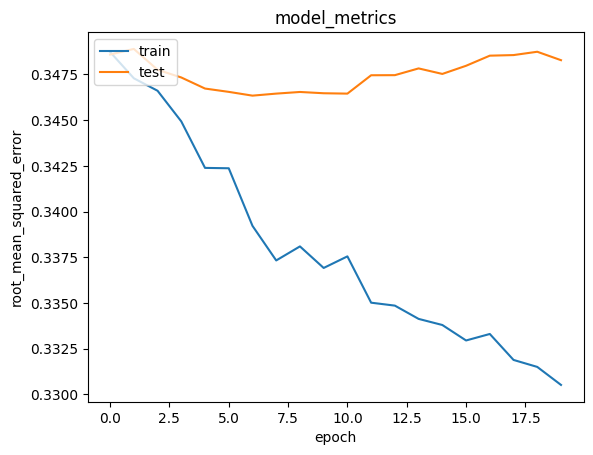

In [51]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("model_metrics")
plt.ylabel("root_mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Nilai RMSE pada datta train dan data test

In [73]:
# Predict using the model
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_val)


# Calculate RMSE Train and Val using Sklearn
train_rmse = root_mean_squared_error(y_train, y_train_pred)
val_rmse = root_mean_squared_error(y_val, y_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Val RMSE: {val_rmse}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train RMSE: 0.3294311139211965
Val RMSE: 0.348280234022521


Mempersiapkan data yang akan digunakan dalam sistem rekomendasi. Data ini akan menjadi input untuk algoritma rekomendasi yang akan memberikan saran destinasi baru kepada pengguna berdasarkan preferensi mereka.

In [ ]:
ratings = pd.read_csv("./dataset/indonesia-tourism-destination/tourism_rating.csv")
data_destination = df_destination[["Place_Id", "Place_Name", "Category"]]

user_id = ratings["User_Id"].sample(1).iloc[0]
destination_reviewed = ratings[ratings["User_Id"] == user_id]

destination_not_reviewed = data_destination[
    ~data_destination["Place_Id"].isin(destination_reviewed["Place_Id"].values)
]["Place_Id"]
destination_not_reviewed = list(
    set(destination_not_reviewed).intersection(set(destination_id_to_encoded.keys()))
)

destination_not_reviewed = [
    [destination_id_to_encoded.get(x)] for x in destination_not_reviewed
]
user_id_encoder = user_id_to_encoded.get(user_id)
user_destination_array = np.hstack(
    ([[user_id_encoder]] * len(destination_not_reviewed), destination_not_reviewed)
)

Melihat hasil rekomendasi model collaborative filtering dari satu user yang ditentukan secara acak

In [66]:
from prettytable import PrettyTable

result_rating = model.predict(user_destination_array).flatten()

top_ratings_indices = result_rating.argsort()[-10:][::-1]
destination_id = [
    anime_encoded_to_anime.get(destination_not_reviewed[x][0]) for x in top_ratings_indices
]

print("Rekomendasi destinasi untuk user_id: ", user_id)
print("===" * 9)
print("Destinasi yang direview: ")
print("===" * 9)

top_five_destination_reviewed = (
    destination_reviewed.sort_values(by="Place_Ratings", ascending=False)
    .head(10)
    .Place_Id.values
)

destination_df = df_destination[df_destination["Place_Id"].isin(top_five_destination_reviewed)]
table_reviewed = PrettyTable()
table_reviewed.field_names = ["Nama", "Kategori", "Rating"]
for index, row in destination_df.iterrows():
    table_reviewed.add_row([row['Place_Name'], row['Category'], row['Rating']])
print(table_reviewed)

print("Rekomendasi destinasi: ")

destination_df = df_destination[df_destination["Place_Id"].isin(destination_id)]
table_recommended = PrettyTable()
table_recommended.field_names = ["Nama", "Kategori", "Rating"]
for index, row in destination_df.iterrows():
    table_recommended.add_row([row['Place_Name'], row['Category'], row['Rating']])
print(table_recommended)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Rekomendasi destinasi untuk user_id:  223
Destinasi yang direview: 
+------------------------------+--------------------+--------+
|             Nama             |      Kategori      | Rating |
+------------------------------+--------------------+--------+
|        Pulau Bidadari        |       Bahari       |  4.6   |
|        Pulau Pramuka         |       Bahari       |  4.2   |
|           Kidzania           |   Taman Hiburan    |  4.6   |
|      Bangsal Pagelaran       |       Budaya       |  4.6   |
| Pasar Kebon Empring Bintaran | Pusat Perbelanjaan |  4.4   |
|        Pantai Sundak         |       Bahari       |  4.5   |
|      Gunung Papandayan       |     Cagar Alam     |  4.6   |
|        Curug Aseupan         |     Cagar Alam     |  4.7   |
|   Sendang Geulis Kahuripan   |     Cagar Alam     |  4.3   |
|     Wisata Eling Bening      |     Cagar Alam     |  4.3   |
+------------------------------+--------------------+--------+
Rekomenda